In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Numerical Quadrature

Okay, so now we are going to get into one of the biggest reasons we do math on computers, and that is to numerically compute integrals.  What we are attempting to do then is, for a given function $f(x)$, find approximations to 

$$
T_{[a,b]}(f) = \int_{a}^{b}f(x) dx.
$$

To do this, we first need to introduce the notion of a mesh $\left\{x_{i}\right\}_{j=0}^{N}$ where

$$
x_{0} =a, ~ x_{N} = b, ~ x_{i+1}-x_{i} = \delta x = \frac{b-a}{N}.
$$

## The Trapezoid Method

Thus, our first attempt at developing an approximation scheme will be to find approximations over intervals $[x_{i},x_{i+1}]$.  Then we will use the identity

$$
\int_{a}^{b} f(x) dx = \sum_{i=0}^{N-1}\int_{x_{i}}^{x_{i+1}}f(x)dx.
$$

Now, on each interval $[x_{i},x_{i+1}]$, we now replace $f(x)$ with a straight-line approximation which connects the points $(x_{i},f(x_{i}))$ and $(x_{i+1},f(x_{i+1}))$.

![trap](https://upload.wikimedia.org/wikipedia/commons/d/d1/Integration_num_trapezes_notation.svg)

What we are saying here is that we make the assumption that

$$
f(x) \approx f(x_{i}) + \frac{(f(x_{i+1})-f(x_{i}))}{\delta x}(x-x_{i}), ~ x\in[x_{i},x_{i+1}].
$$

The advantage of doing this is that we can readily compute the integral of the right-hand side of our approximation.


_Problem_: Using the approximation to the function, find an approximation to the integral of $f(x)$ over the interval $[x_{i},x_{i+1}]$.  

So as we discussed in class, this is given by 

$$
\int_{x_{j}}^{x_{j+1}} f(x) dx \approx \frac{\delta x}{2}\left(f(x_{j}) + f(x_{j+1})\right)
$$

_Problem_: Combine your approximations over each sub interval $[x_{i},x_{i+1}]$ to build an approximation for the integral of $f(x)$ on $[a,b]$.    

Again, as discussed in class, this becomes 

$$
\int_{a}^{b}f(x) dx \approx \frac{\delta x}{2}\left(f(a) + f(b) + 2\sum_{j=1}^{N-1}f(x_{j})\right)
$$

_Problem_: Code it.  Test it.

In [4]:
def trapezoid_method(a,b,N,f):
    Nint = int(N)
    xvals = np.linspace(a,b,Nint+1)    
    fvals = f(xvals) 
    dx = (b-a)/N
    return dx/2. * ( fvals[0] + fvals[-1] + 2.*np.sum(fvals[1:-1]) ) 

In [5]:
def f(xvals):
    fvals = (np.cos(xvals))**2.
    return fvals
# test your code 

In [6]:
print(trapezoid_method(0.,2.*np.pi,100,f))

3.141592653589794


### Error Analysis for the Trapezoid Method

If we denote the approximation to $T_{[a,b]}(f)$ via the Trapezoid Method as $A_{N}(f)$, we want to figure out how the difference between these two things behaves as a function of $N$, or equivalently, $\delta x$.  We suppose that 

$$
T_{[a,b]}(f) = A_{N}(f) + C\left(\delta x\right)^{p}, ~ \delta x = \frac{b-a}{N}.
$$

So how can we find $p$?  Well, our friend the logarithm returns since we see that 

$$
\log_{10}\left|T_{[a,b]}(f) - A_{N}(f) \right| = \log_{10}C + p\left(\log_{10}(b-a) - \log_{10} N \right)
$$

Thus, if we compare the log of the error to the log of the number of intervals in our mesh, then the slope of that line should be the rate of decay, or how the error decreases as we increase the number of points in the mesh. 

_Problem_: Write code to find $p$.  This means you need to think of a test case for which you know the answer and then generate a series of comparisons which allow you to infer a trend.  

In [10]:
def error_test():
    f = lambda x: (np.cos(x))**2.
    a,b = 0., np.pi/4.
    tval = .5*(np.pi/4. + .5)
    Nvals = np.array([1e1, 1e2, 1e3, 1e4, 1e5])
    Evals = np.zeros(Nvals.size)
    for jj in range(Nvals.size):
        Evals[jj] = tval - trapezoid_method(a,b,Nvals[jj],f) 
    xvals = np.log10(Nvals)
    plt.plot(xvals,Evals)
    novals = Evals.size
    slopes = np.log10(np.abs(Evals[1:])) - np.log10(np.abs(Evals[0:-1])) 
    print(np.min(slopes))
    print(np.max(slopes))
    print(np.mean(slopes))

In [ ]:
def csq(xvals):
    return (np.cos(xvals))**2.

-2.0001768787071543
-1.9999885567308464
-2.0000418002299023


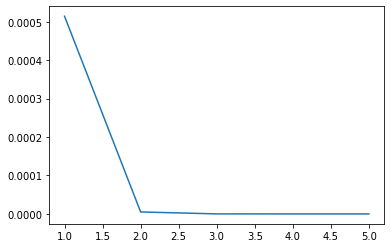

In [11]:
error_test()

## Simpon's Method

So, if lines were great, what if we used a more accurate means of approximating a function?  To do this, we will work over three mesh points, say $[x_{j},x_{j+2}]$, and then make the approximation

$$
f(x) \approx a_{j+1}(x-x_{j+1})^{2} + b_{j+1}(x-x_{j+1}) + c_{j+1},
$$

with the interpolation requirements

\begin{align}
y_{j+1}(x_{j}) = & f(x_{j})\\
y_{j+1}(x_{j+1}) = & f(x_{j+1})\\
y_{j+1}(x_{j+2}) = & f(x_{j+2})
\end{align}

![simp](https://jeremykun.files.wordpress.com/2011/12/simpson.png?w=1800)

Then, using this approximation, we approximate the integral of $f$ over $[x_{j},x_{j+2}]$ via 

$$
\int_{x_{j}}^{x_{j+2}}f(x) dx \approx \int_{x_{j}}^{x_{j+2}} y_{j+1}(x)dx.
$$

In [ ]:
def simpson_method(a,b,N,f):
    Nint = int(N)
    xvals = np.linspace(#add code here )
    fvals = f(xvals)
    dx = #add code here 
    return #add code here 

## Adaptive Quadrature

So, as we you show in the homework, letting

$$
T_{[a,b]}(f) = \int_{a}^{b}f(x)dx
$$

and

$$
A_{[a,b]}(f) = \frac{(b-a)}{6}\left(f(a) + 4f(c) + f(b)\right), ~ c = \frac{a+b}{2},
$$

Simpson's method gives us

$$
T_{[a,b]}(f) \approx A_{[a,b]}(f) + C_{0}(b-a)^{5}.
$$

Note, the true story is actually a bit more complicated, and we really should write

$$
T_{[a,b]}(f) = A_{[a,b]}(f) + C_{0}(b-a)^{5} + C_{1}(b-a)^{6} + \cdots.
$$

In this vein, if we split $T_{[a,b]}(f)$ into 

$$
T_{[a,b]}(f) = T_{[a,c]}(f) + T_{[c,b]}(f), ~ c = \frac{a+b}{2},
$$

then we we can build a better approximation by using

$$
T_{[a,b]}(f) = A_{[a,c]}(f) + A_{[c,b]}(f) + \frac{C_{0}}{16}(b-a)^{5} + \cdots
$$

Now, where this gets really tricky is that we can do better yet still.  Here is how.  From my new approximation, I can write

$$
16 T_{[a,b]}(f) = 16\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right) + C_{0}(b-a)^{5} + \cdots
$$

Using the old approximation, I get 

$$
15 T_{[a,b]}(f) = 16\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right) - A_{[a,b]}(f) + \cdots
$$

and thus we get the new and improved approximation

$$
T_{[a,b]}(f) = \frac{16}{15}\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right) - \frac{1}{15}A_{[a,b]}(f) + \cdots
$$

So now think about that.  By building two different approximations, I am able to get a third, yet better one.  But we can also ask another kind of question.  What if 

$$
\left|\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right) - A_{[a,b]}(f)\right| < \mbox{tol} ~ \mbox{?}
$$

As in, okay, I make two approximations, one okay, one better.  But the difference between them is not so large?  Then what is the point of continuing to make smaller subdivisions of the interval when I am actually happy with what I have got?  So, how would I implement a method based on this line of thinking?  And what would it get me?  

## A brief aside on recursion in Python

While we haven't had too much use for it yet, it is worth while to see some relatively simple examples of more classic recursive programs in Python. What I mean by this is the following.  Say we wanted to compute the factorial of an integer $n$, i.e. we want to find $n!$.  Well, then we use the recursive formula

$$
n! = n(n-1)!
$$

along with the stopping criteria that $0!=1$.  In code, this looks like 

In [ ]:
def r_factorial(n):
    if n==0: # Here we implement the stopping criteria which ends the recursion.  
        return 1
    else: # Here, having not reached a stoppping point, we recurse
        return #add code here 

In [ ]:
print("An example for n=3, 3!=%d"%r_factorial(3))

Returning then to our adaptive, recursive integration scheme, we use the skeleton below.  

In [ ]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol,ptlst):
    
    d = #add code here 
    e = #add code here 
    ptlst.append(d)
    ptlst.append(e)
    fd = f(d)
    fe = f(e)
    dx = d-a
    Aac = #add code here 
    Acb = #add code here 
    if np.abs(#add code here )<=tol: # This is our stopping condition in terms of tol
        return (16./15.*(Aac+Acb)-Aab/15.)
    else: # This is if we do not meet the tol condition 
        F1 = #add code here 
        F2 = #add code here 
        return F1 + F2

In [ ]:
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = #add code here 
    fb = #add code here 
    fc = #add code here 
    dx = c-a
    Aab = #add code here 
    ptlst = [a, c, b]
    ival = #add code here 
    '''
    # Plotting commands which are not essential to understand at this time.  
    ptlst.sort()
    for jj in xrange(0,len(ptlst)):
        fval = f(ptlst[jj])
        if fval > 0:
            plt.plot([ptlst[jj],ptlst[jj]],[0,fval],color='r',ls='--')
        else:
            plt.plot([ptlst[jj],ptlst[jj]],[fval,0],color='r',ls='--')
    xvals = np.linspace(a,b,int(1e3))
    yvals = f(xvals)
    zvals = np.zeros(xvals.size)
    plt.plot(xvals,yvals,color='k',ls='-')
    plt.plot(xvals,zvals,color='k',ls='-')
    '''
    return ival

In [ ]:
faq = lambda x : np.sin(x**2.)
print(adap_quad(faq,0.,3.6,1e-4))

In [ ]:
def adap_error_test(a,b,f):
    tval = (b-a)/2. + (np.sin(2.*b)-np.sin(2.*a))/4.
    tolvals = np.array([1e-1,1e-2,1e-3,1e-4])
    Evals = np.zeros(tolvals.size)
    for jj in xrange(0,tolvals.size):
        Evals[jj] = np.log10(np.abs(tval - adap_quad(f,a,b,tolvals[jj])))
    xvals = -np.log10(tolvals)
    plt.plot(xvals,Evals)
    plt.xlabel('$-log_{10}(tol)$')
    plt.ylabel('$log_{10}(Error)$')
    
    novals = Evals.size
    slopes = (Evals[1:novals]-Evals[0:novals-1])/(xvals[1:novals]-xvals[0:novals-1])
    print(np.min(slopes))
    print(np.max(slopes))
    print(np.mean(slopes))

In [ ]:
adap_error_test(1.,2.,csq)